<a href="https://colab.research.google.com/github/gorky93/stackoverflow_analysis/blob/main/stackoverflow24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git config --global user.email "sdmathdeep@gmail.com"
!git config --global user.name "gorky93"

In [ ]:
!git clone https://github.com/gorky93/stackoverflow_analysis.git

Cloning into 'stackoverflow_analysis'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 213.31 KiB | 1.04 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
import zipfile
zip_path = '/content/drive/My Drive/Project Data/stack-overflow-developer-survey-2024.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./data')

In [ ]:
!ls '/content/drive/My Drive/Project Data/'

'CBC data_for_meandeley_csv1.csv'   stack-overflow-developer-survey-2024.zip


In [ ]:
!ls

data  drive  sample_data  stackoverflow_analysis


In [ ]:
import os
print(os.listdir('./data'))

['survey_results_public.csv', 'survey_results_schema.csv', '2024 Developer Survey.pdf']


In [ ]:
# importing important libraries and initial exploration.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set up plotting styles
# plt.style.use('seaborn-whitegrid')  # This style is deprecated.
plt.style.use('seaborn-v0_8-whitegrid')  # Use this style instead for Seaborn whitegrid theme.
sns.set(style="whitegrid")  # Seaborn's set function still works with "whitegrid".

In [ ]:
survey_results = pd.read_csv('./data/survey_results_public.csv')
schema = pd.read_csv('./data/survey_results_schema.csv')

So, I have been reading the pdf of the survey and the survey is divided into 7 themes:

1. Basic Information
2. Education, Work, and Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Artificial Intelligence
6. Professional Developer Series (Optional)
7. Final Questions

My analysis will be from the point of view of a math/eng background breaking into tech.

In [ ]:
print(survey_results.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [ ]:
missing_percentages = (survey_results.isnull().sum() / len(survey_results)) * 100
missing_percentages[missing_percentages>0].sort_values(ascending=False)

,0
AINextMuch less integrated,98.245641
AINextLess integrated,96.401119
AINextNo change,80.900714
AINextMuch more integrated,79.464217
EmbeddedAdmired,74.428840
...,...
YearsCode,8.508948
NEWSOSites,7.871693
LearnCode,7.563000
EdLevel,7.110656


Anything with more than 50% missing values is strange and will need to be carefully dealt with if I decide to train the model later.

In [ ]:
print(f"Dataset shape: {survey_results.shape}")
survey_results.head()

Dataset shape: (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


So, it appears that in the dataset, there are 114 columns and 65,437 rows. The first thing i want to understand is the demographics and the columns under Basic Inoformation. It's better for this case to check out the column from the pdf file. But i wonder if there is a beter way to access which columns to explore first in case of big datasets.

In [ ]:
schema.columns

Index(['qid', 'qname', 'question', 'force_resp', 'type', 'selector'], dtype='object')

In [ ]:
survey_results.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [ ]:
schema

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
...,...,...,...,...,...,...
82,QID337,JobSatPoints_7,"Learning and using new technology, including p...",NaN,MC,MAVR
83,QID337,JobSatPoints_8,"Designing and building environments, databases...",NaN,MC,MAVR
84,QID337,JobSatPoints_9,"Being a power user of a tool, developer langua...",NaN,MC,MAVR
85,QID337,JobSatPoints_10,Working with new and/or top-quality hardware,NaN,MC,MAVR


From the schma dataframe, we only require the qname and the question stated explicitly. So it's better to take the two columns and convert it into a pandas series.

In [ ]:
schema_series = schema.set_index('qname')['question']

In [ ]:
schema_series

,question
qname,
MainBranch,Which of the following options best describes ...
Age,What is your age?*
Employment,Which of the following best describes your cur...
RemoteWork,Which best describes your current work situation?
Check,Just checking to make sure you are paying atte...
...,...
JobSatPoints_7,"Learning and using new technology, including p..."
JobSatPoints_8,"Designing and building environments, databases..."
JobSatPoints_9,"Being a power user of a tool, developer langua..."


Let's start with demographic analysis, and analyze the column age

In [ ]:
survey_results['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

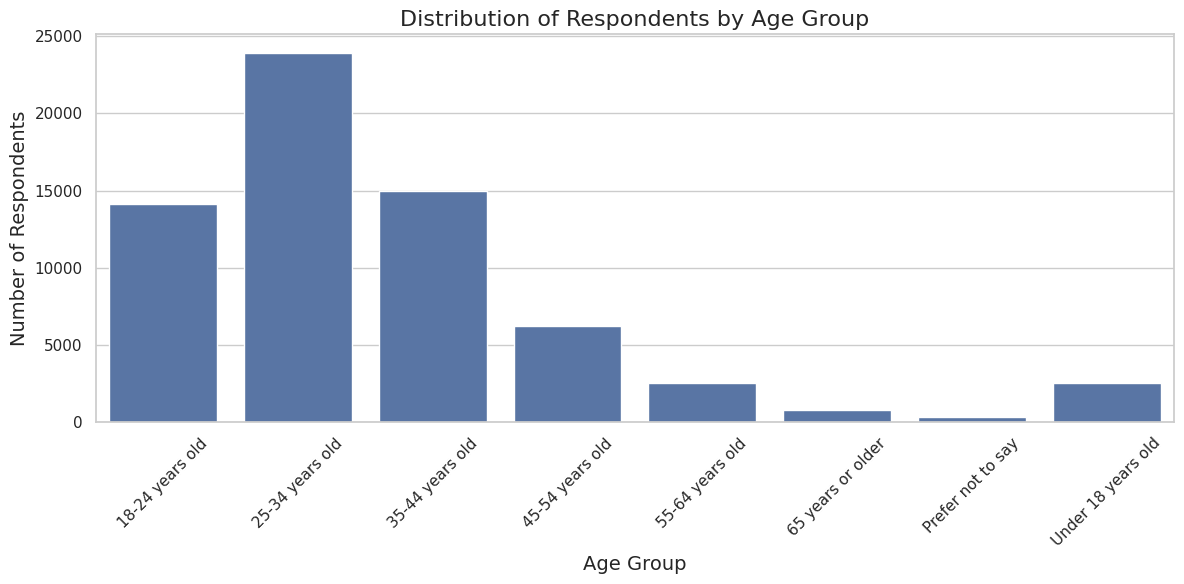

In [ ]:
plt.figure(figsize=(12, 6))
age_counts = survey_results['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Distribution of Respondents by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
schema_series.MainBranch


'Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".*'

In [26]:
survey_results['MainBranch'].value_counts()

,count
MainBranch,
I am a developer by profession,50207
"I am not primarily a developer, but I write code sometimes as part of my work/studies",6511
I am learning to code,3875
I code primarily as a hobby,3334
"I used to be a developer by profession, but no longer am",1510


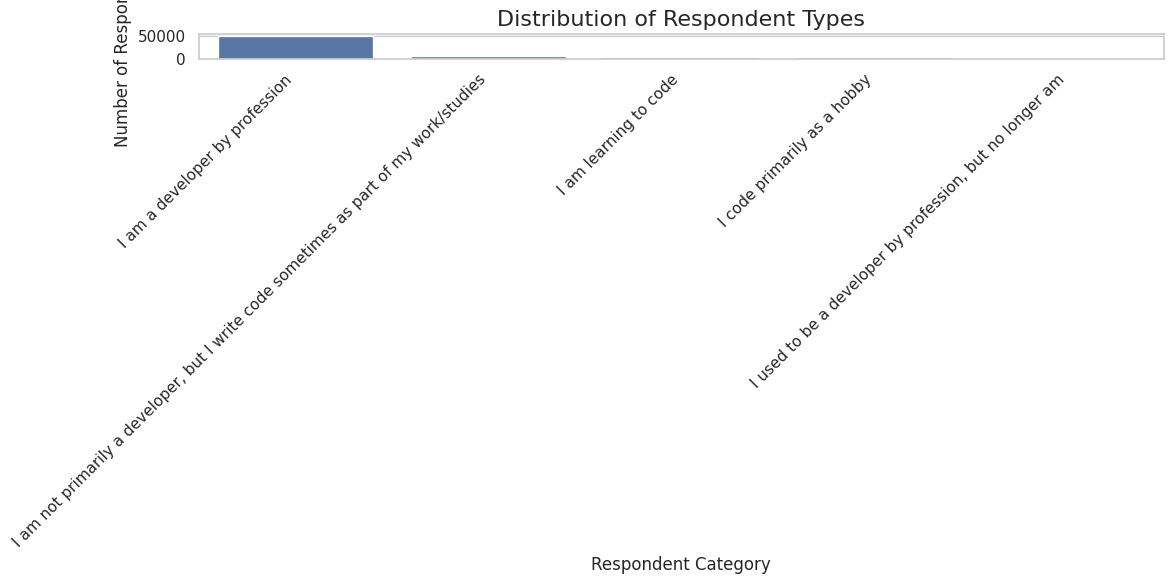

In [ ]:
# Create a bar plot for MainBranch
plt.figure(figsize=(12, 6))

# Count the occurrences of each category
main_branch_counts = survey_results['MainBranch'].value_counts()

# Create the bar plot
sns.barplot(x=main_branch_counts.index, y=main_branch_counts.values)

# Customize the plot
plt.title('Distribution of Respondent Types', fontsize=16)
plt.xlabel('Respondent Category', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [27]:
schema_series.Employment

'Which of the following best describes your current employment status? Select all that apply.*'

In [30]:
survey_results['Employment'].value_counts()

,count
Employment,
"Employed, full-time",39041
"Independent contractor, freelancer, or self-employed",4846
"Student, full-time",4709
"Employed, full-time;Independent contractor, freelancer, or self-employed",3557
"Not employed, but looking for work",2341
"Employed, part-time",1266
"Student, full-time;Employed, part-time",1115
"Employed, full-time;Student, full-time",897
"Employed, full-time;Student, part-time",839


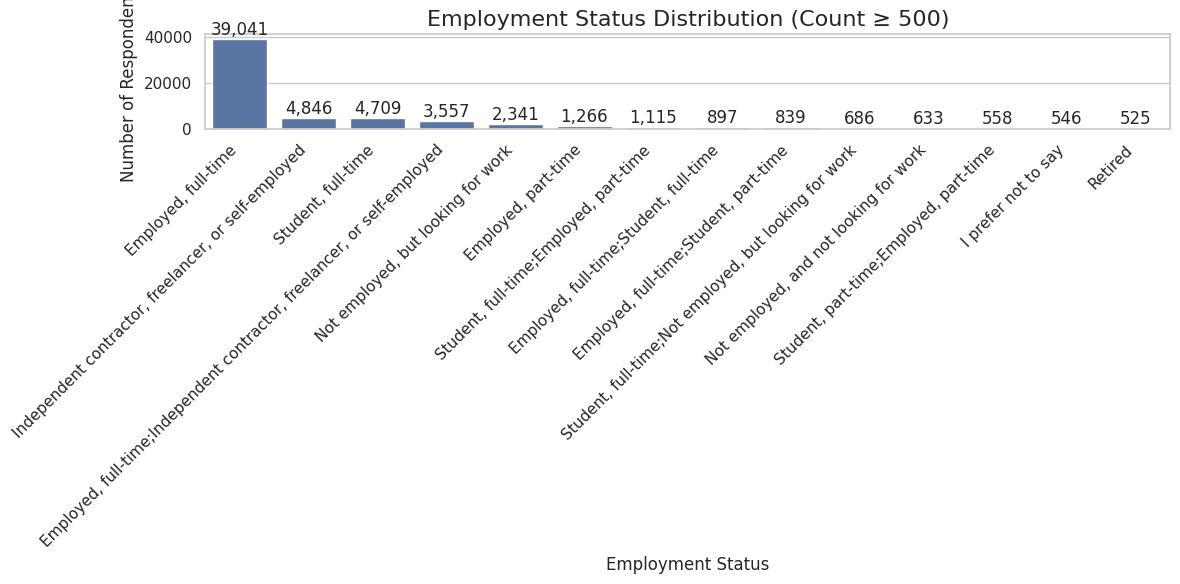

Filtered out 96 categories with count < 500
Showing 14 categories with count ≥ 500


In [33]:
# Get value counts for Employment column
employment_counts = survey_results['Employment'].value_counts()

# Filter to only include categories with count >= 500
filtered_employment = employment_counts[employment_counts >= 500]


# Create the visualization with the filtered data
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_employment.index, y=filtered_employment.values)
plt.title('Employment Status Distribution (Count ≥ 500)', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels
for i, v in enumerate(filtered_employment.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.show()

# Print how many categories were filtered out
print(f"Filtered out {len(employment_counts) - len(filtered_employment)} categories with count < 500")
print(f"Showing {len(filtered_employment)} categories with count ≥ 500")

So the most frequent column seem to the fully employeed developers, which makes sense, as they need to use stackoverflow to sort their coding problems.It will be interesting to compare this with the survey before llms came to the picture. It will be easier to understand how helpful llms are to serious professionals. The next most frequent response are of the freelancers.The third most frequent clinetele are the students.

In [34]:
schema_series.RemoteWork

'Which best describes your current work situation?'

In [35]:
survey_results.RemoteWork.value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",23015
Remote,20831
In-person,10960


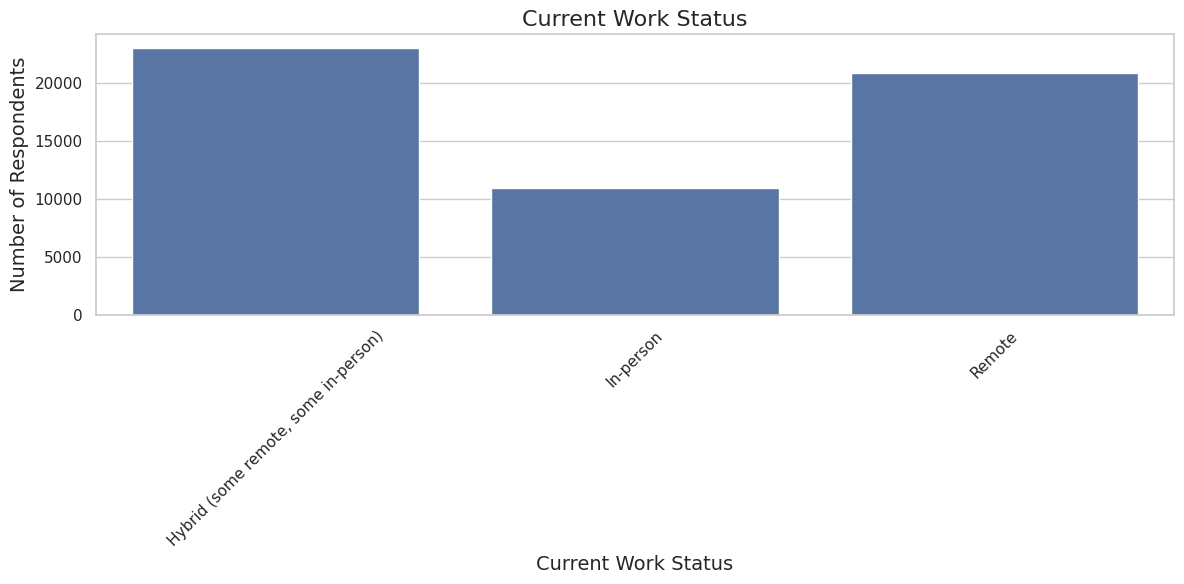

In [36]:
plt.figure(figsize=(12, 6))
remotework_counts = survey_results['RemoteWork'].value_counts().sort_index()
sns.barplot(x=remotework_counts.index, y=remotework_counts.values)
plt.title('Current Work Status', fontsize=16)
plt.xlabel('Current Work Status', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()